In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
zero_grid=np.array([[1,1,1,1,1],
                   [1,0,0,0,1],
                   [1,0,0,0,1],
                   [1,0,0,0,1],
                   [1,1,1,1,1],])

one_grid=np.array([[0,0,0,0,1],
                   [0,0,0,0,1],
                   [0,0,0,0,1],
                   [0,0,0,0,1],
                   [0,0,0,0,1],])

two_grid=np.array([[1,1,1,1,1],
                   [0,0,0,0,1],
                   [1,1,1,1,1],
                   [1,0,0,0,0],
                   [1,1,1,1,1],])

three_grid=np.array([[1,1,1,1,1],
                   [0,0,0,0,1],
                   [1,1,1,1,1],
                   [0,0,0,0,1],
                   [1,1,1,1,1],])

four_grid=np.array([[1,0,0,0,1],
                   [1,0,0,0,1],
                   [1,1,1,1,1],
                   [0,0,0,0,1],
                   [0,0,0,0,1],])

five_grid=np.array([[1,1,1,1,1],
                   [1,0,0,0,0],
                   [1,1,1,1,1],
                   [0,0,0,0,1],
                   [1,1,1,1,1],])

six_grid=np.array([[1,1,1,1,1],
                   [1,0,0,0,0],
                   [1,1,1,1,1],
                   [1,0,0,0,1],
                   [1,1,1,1,1],])

seven_grid=np.array([[1,1,1,1,1],
                   [0,0,0,0,1],
                   [0,0,0,0,1],
                   [0,0,0,0,1],
                   [0,0,0,0,1],])

eight_grid=np.array([[1,1,1,1,1],
                   [1,0,0,0,1],
                   [1,1,1,1,1],
                   [1,0,0,0,1],
                   [1,1,1,1,1],])

nine_grid=np.array([[1,1,1,1,1],
                   [1,0,0,0,1],
                   [1,1,1,1,1],
                   [0,0,0,0,1],
                   [1,1,1,1,1],])

digit_grids=[zero_grid,one_grid,two_grid,three_grid,four_grid,five_grid,six_grid,seven_grid,eight_grid,nine_grid]

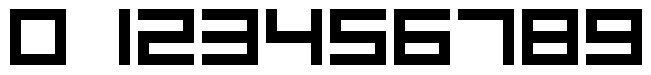

In [3]:
fig,axs=plt.subplots(nrows=1,ncols=10,layout='constrained')
axs_flat=axs.flatten()

for n in range(10):
    axs_flat[n].imshow(digit_grids[n],cmap='Greys')
    axs_flat[n].axis('off')

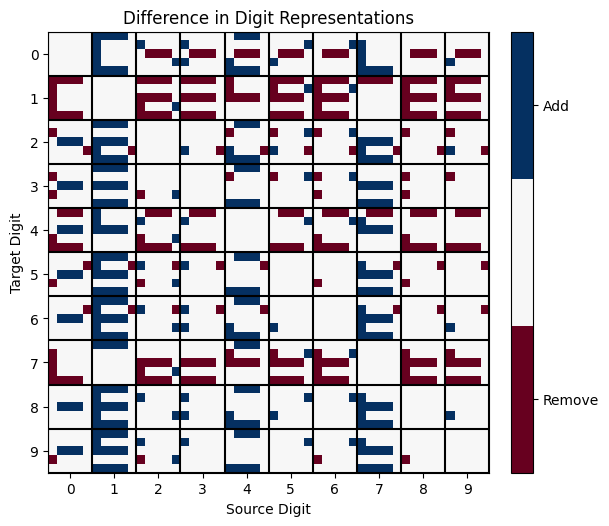

In [4]:
fig,axs=plt.subplots(nrows=1,ncols=1,layout='constrained')
fig.set_figheight(6)
fig.set_figwidth(6)
cmap=['red','white','blue']
digit_difference=np.zeros((50,50))
for positive_digit in range(10):
    positive_digit_grid=digit_grids[positive_digit]
    for negative_digit in range(10):
        negative_digit_grid=digit_grids[negative_digit]
        digit_difference[positive_digit*5:(positive_digit+1)*5,negative_digit*5:(negative_digit+1)*5]=positive_digit_grid-negative_digit_grid
colors=plt.get_cmap('RdBu',3)
im=axs.imshow(digit_difference,cmap=colors)
for x in 5*np.arange(11)-0.5:
    axs.axvline(x,color='black')
    axs.axhline(x,color='black')
axs.set_yticks(2+5*np.arange(10),labels=np.arange(10))
axs.set_xticks(2+5*np.arange(10),labels=np.arange(10))
axs.set_xlabel('Source Digit')
axs.set_ylabel('Target Digit')
axs.set_title('Difference in Digit Representations')
cbar=fig.colorbar(im,fraction=0.05,ticks=(-2/3,2/3))
cbar.ax.set_yticklabels(['Remove','Add'])
plt.show()

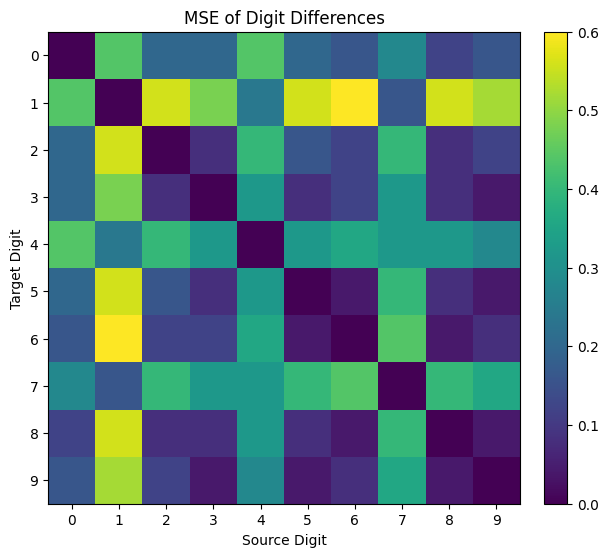

In [5]:
fig,axs=plt.subplots(nrows=1,ncols=1,layout='constrained')
fig.set_figheight(6)
fig.set_figwidth(6)
mse_difference=np.zeros((50,50))
mses=[]
for positive_digit in range(10):
    positive_digit_grid=digit_grids[positive_digit]
    for negative_digit in range(10):
        negative_digit_grid=digit_grids[negative_digit]
        mse=mean_squared_error(positive_digit_grid,negative_digit_grid)
        mse_difference[positive_digit*5:(positive_digit+1)*5,negative_digit*5:(negative_digit+1)*5]=mse*np.ones((5,5))
        mses.append(mse)

im=axs.imshow(mse_difference)

axs.set_yticks(2+5*np.arange(10),labels=np.arange(10))
axs.set_xticks(2+5*np.arange(10),labels=np.arange(10))
axs.set_xlabel('Source Digit')
axs.set_ylabel('Target Digit')
fig.colorbar(im,fraction=0.05)
axs.set_title('MSE of Digit Differences')

plt.show()